In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
colmns = df.columns
colmns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

## Basic info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
import pandas as pd

def check_zeros_length(df):
    """
    This function checks the length of zero values in each column of a DataFrame.
    """
    for col in df.columns:
        zeros_length = len(df[df[col] == 0])
        print(f"Column {col} has ------------- {zeros_length}------------ zeros")
        
check_zeros_length(df)

Column age has ------------- 0------------ zeros
Column workclass has ------------- 0------------ zeros
Column fnlwgt has ------------- 0------------ zeros
Column education has ------------- 0------------ zeros
Column educational-num has ------------- 0------------ zeros
Column marital-status has ------------- 0------------ zeros
Column occupation has ------------- 0------------ zeros
Column relationship has ------------- 0------------ zeros
Column race has ------------- 0------------ zeros
Column gender has ------------- 0------------ zeros
Column capital-gain has ------------- 44807------------ zeros
Column capital-loss has ------------- 46560------------ zeros
Column hours-per-week has ------------- 0------------ zeros
Column native-country has ------------- 0------------ zeros
Column income has ------------- 0------------ zeros


A bunch we don't need. So like education level you can take out. We don't need marital status. Don't put race.

In [7]:
print('****workclass**** \n',df.workclass.unique())
print('------------------------------')
print('****education**** \n',df.education.unique())
print('------------------------------')
print('****marital-status**** \n',df['marital-status'].unique())
print('------------------------------')
print('****occupation**** \n',df.occupation.unique())
print('------------------------------')
print('****relationship**** \n',df.relationship.unique())
print('------------------------------')
print('****race**** \n',df.race.unique())
print('------------------------------')
print('****gender**** \n',df.gender.unique())
print('------------------------------')
print('****native-country**** \n',df['native-country'].unique())
print('------------------------------')
print('****income**** \n',df.income.unique())

# print('predclass',df.predclass.unique())

****workclass**** 
 ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
------------------------------
****education**** 
 ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
------------------------------
****marital-status**** 
 ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
------------------------------
****occupation**** 
 ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
------------------------------
****relationship**** 
 ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
------------------------------
****race**** 

In [8]:
# import seaborn as sns
# fig = plt.figure(figsize=(4,3))
# plt.style.use('seaborn-ticks')
# sns.countplot(x="income", data=df)

In [9]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df.corr()

C:\Users\SK-Gujjar\AppData\Local\Temp\ipykernel_2908\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


## Label Encodeing

In [11]:

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [12]:
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
df['income'] = labelencoder.fit_transform(df['income'])
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


## EDA

#### Education

In [13]:
df['education'].replace('Preschool', 'dropout',inplace=True)
df['education'].replace('10th', 'dropout',inplace=True)
df['education'].replace('11th', 'dropout',inplace=True)
df['education'].replace('12th', 'dropout',inplace=True)
df['education'].replace('1st-4th', 'dropout',inplace=True)
df['education'].replace('5th-6th', 'dropout',inplace=True)
df['education'].replace('7th-8th', 'dropout',inplace=True)
df['education'].replace('9th', 'dropout',inplace=True)
df['education'].replace('HS-Grad', 'HighGrad',inplace=True)
df['education'].replace('HS-grad', 'HighGrad',inplace=True)
df['education'].replace('Some-college', 'CommunityCollege',inplace=True)
df['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
df['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
df['education'].replace('Bachelors', 'Bachelors',inplace=True)
df['education'].replace('Masters', 'Masters',inplace=True)
df['education'].replace('Prof-school', 'Masters',inplace=True)
df['education'].replace('Doctorate', 'Doctorate',inplace=True)

In [14]:
# ?

In [15]:
df[['education', 'educational-num']].groupby(['education'], as_index=False).mean().sort_values(by='educational-num', ascending=False)

,education,educational-num
2,Doctorate,16.000000
4,Masters,14.238900
0,Bachelors,13.000000
1,CommunityCollege,10.361967
3,HighGrad,9.000000
5,dropout,5.614544


In [16]:
# fig = plt.figure(figsize=(4,3))
# plt.style.use('seaborn-ticks')
# sns.countplot(x="income", data=df)

C:\Users\SK-Gujjar\AppData\Local\Temp\ipykernel_2908\2230548387.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


<Axes: xlabel='count', ylabel='education'>

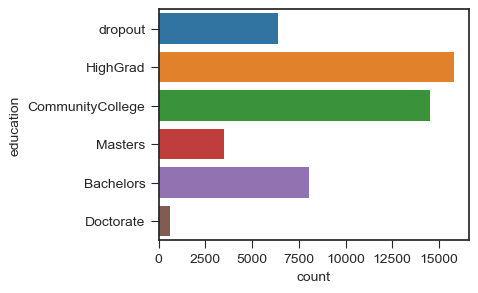

In [17]:
import seaborn as sns
fig = plt.figure(figsize=(4,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=df)

#### Marital-status

In [18]:
#df2 = my_df['marital-status'].replace(' Never-married', 'NotMarried')
df['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
df['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
df['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
df['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
df['marital-status'].replace(['Separated'], 'Separated',inplace=True)
df['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
df['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

C:\Users\SK-Gujjar\AppData\Local\Temp\ipykernel_2908\551818912.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


<Axes: xlabel='count', ylabel='marital-status'>

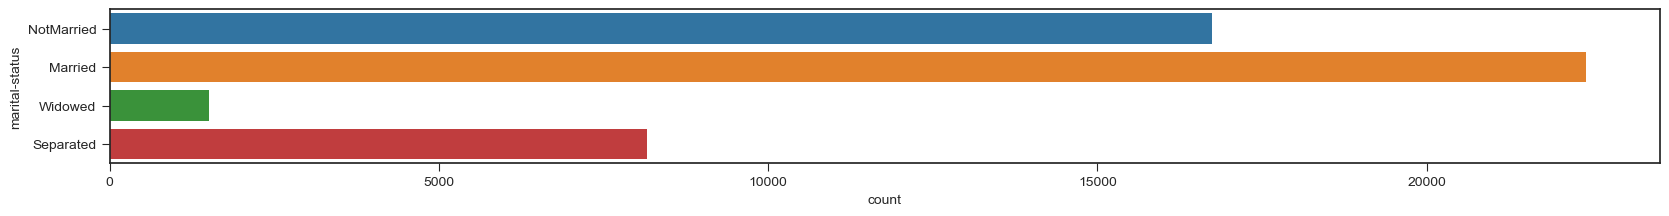

In [19]:
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="marital-status", data=df)

#### Occupation

In [20]:
# rows_with_question_mark = df[df["occupation"] == "?"]
# rows_with_question_mark
df[(df['workclass'] == '?') & (df['occupation'] == '?')]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,CommunityCollege,10,NotMarried,?,Own-child,White,Female,0,0,30,United-States,0
6,29,?,227026,HighGrad,9,NotMarried,?,Unmarried,Black,Male,0,0,40,United-States,0
13,58,?,299831,HighGrad,9,Married,?,Husband,White,Male,0,0,35,United-States,0
22,72,?,132015,dropout,4,Separated,?,Not-in-family,White,Female,0,0,6,United-States,0
35,65,?,191846,HighGrad,9,Married,?,Husband,White,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,320084,Bachelors,13,Married,?,Wife,White,Female,0,0,55,United-States,1
48812,30,?,33811,Bachelors,13,NotMarried,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,0
48820,71,?,287372,Doctorate,16,Married,?,Husband,White,Male,0,0,10,United-States,1
48822,41,?,202822,HighGrad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,0


In [21]:
df[['workclass', 'occupation','native-country']] = df[['workclass', 'occupation','native-country']].replace('?', 'other')

C:\Users\SK-Gujjar\AppData\Local\Temp\ipykernel_2908\2145472311.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


<Axes: xlabel='count', ylabel='occupation'>

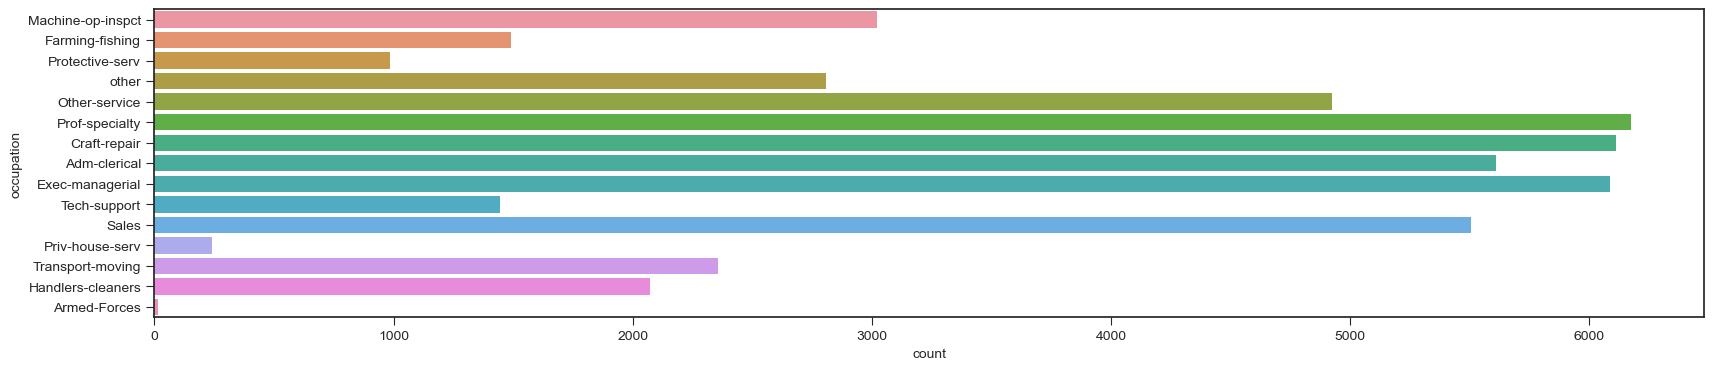

In [22]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=df)

#### Workclass

C:\Users\SK-Gujjar\AppData\Local\Temp\ipykernel_2908\3011617667.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


<Axes: xlabel='count', ylabel='workclass'>

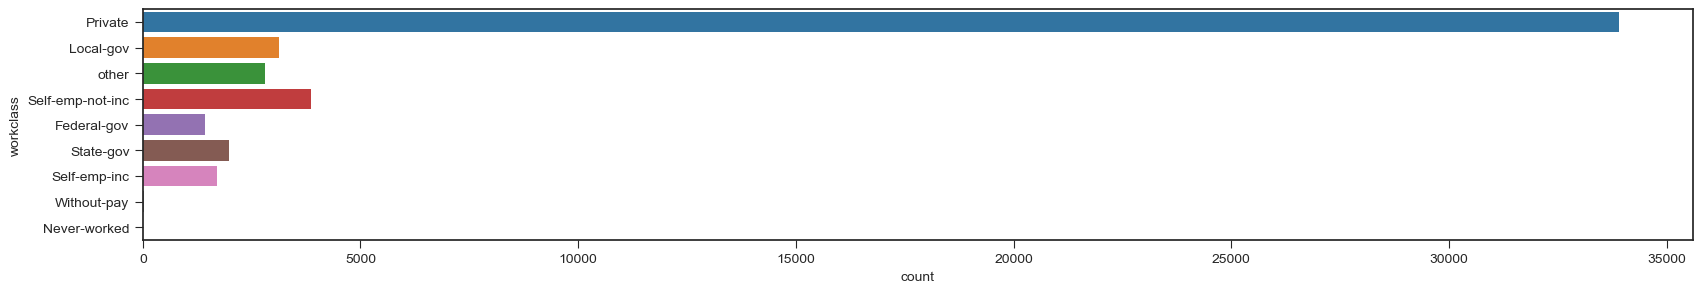

In [23]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3)) 
sns.countplot(y="workclass", data=df)

#### Age

In [24]:
import warnings
warnings.filterwarnings('ignore')

# make the age variable discretized frequency 
df['age_bin'] = pd.cut(df['age'], 20)

<Axes: xlabel='age', ylabel='Density'>

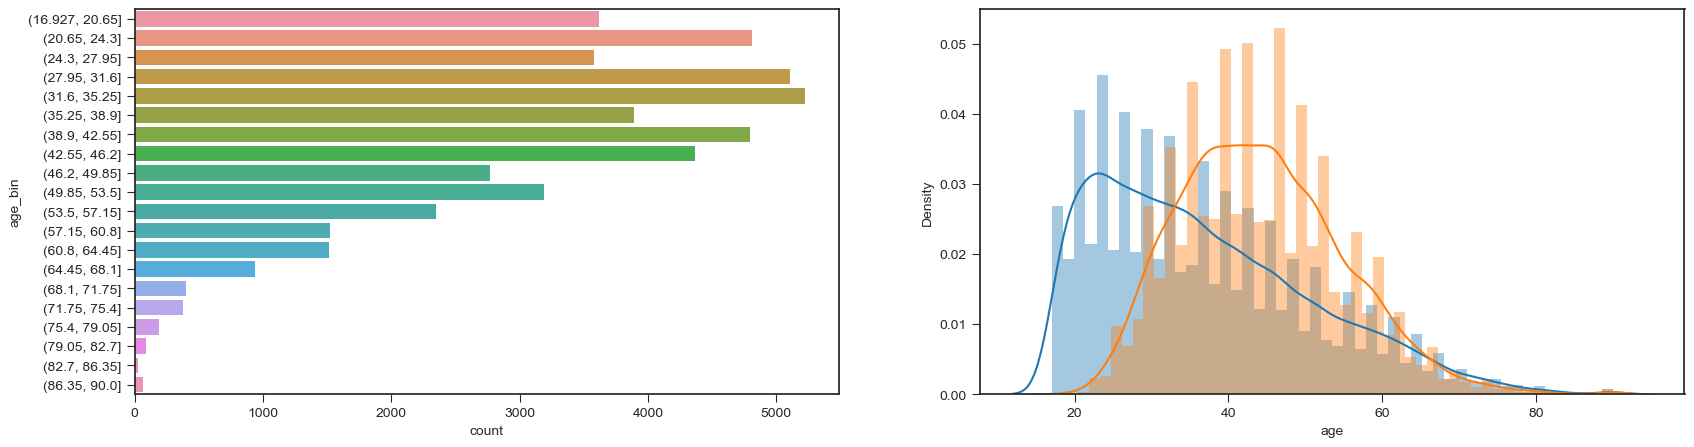

In [25]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age_bin", data=df)
plt.subplot(1, 2, 2)
sns.distplot(df[df['income'] == 0]['age'], kde_kws={"label": 0})
sns.distplot(df[df['income'] == 1]['age'], kde_kws={"label": 1})

In [26]:
# Mean of less then 50k and greater then 50k employee

In [27]:
df[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

,income,age
1,1,44.275178
0,0,36.872184


#### Hours of Work

In [28]:
# Let's use the Pandas Cut function to bin the data in equally sized buckets
df['hours-per-week_bin'] = pd.cut(df['hours-per-week'], 10)
df['hours-per-week'] = df['hours-per-week']

(20.0, 60.0)

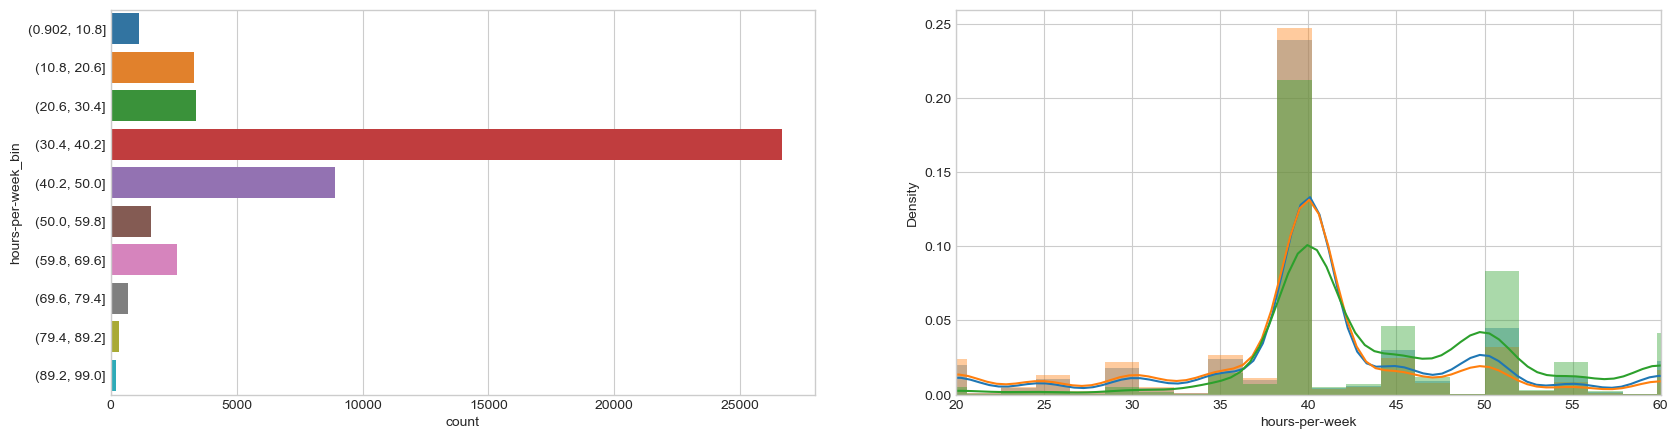

In [29]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="hours-per-week_bin", data=df);
plt.subplot(1, 2, 2)
sns.distplot(df['hours-per-week']);
sns.distplot(df[df['income'] == 0]['hours-per-week'], kde_kws={"label": ">$50K"})
sns.distplot(df[df['income'] == 1]['hours-per-week'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(20, 60)

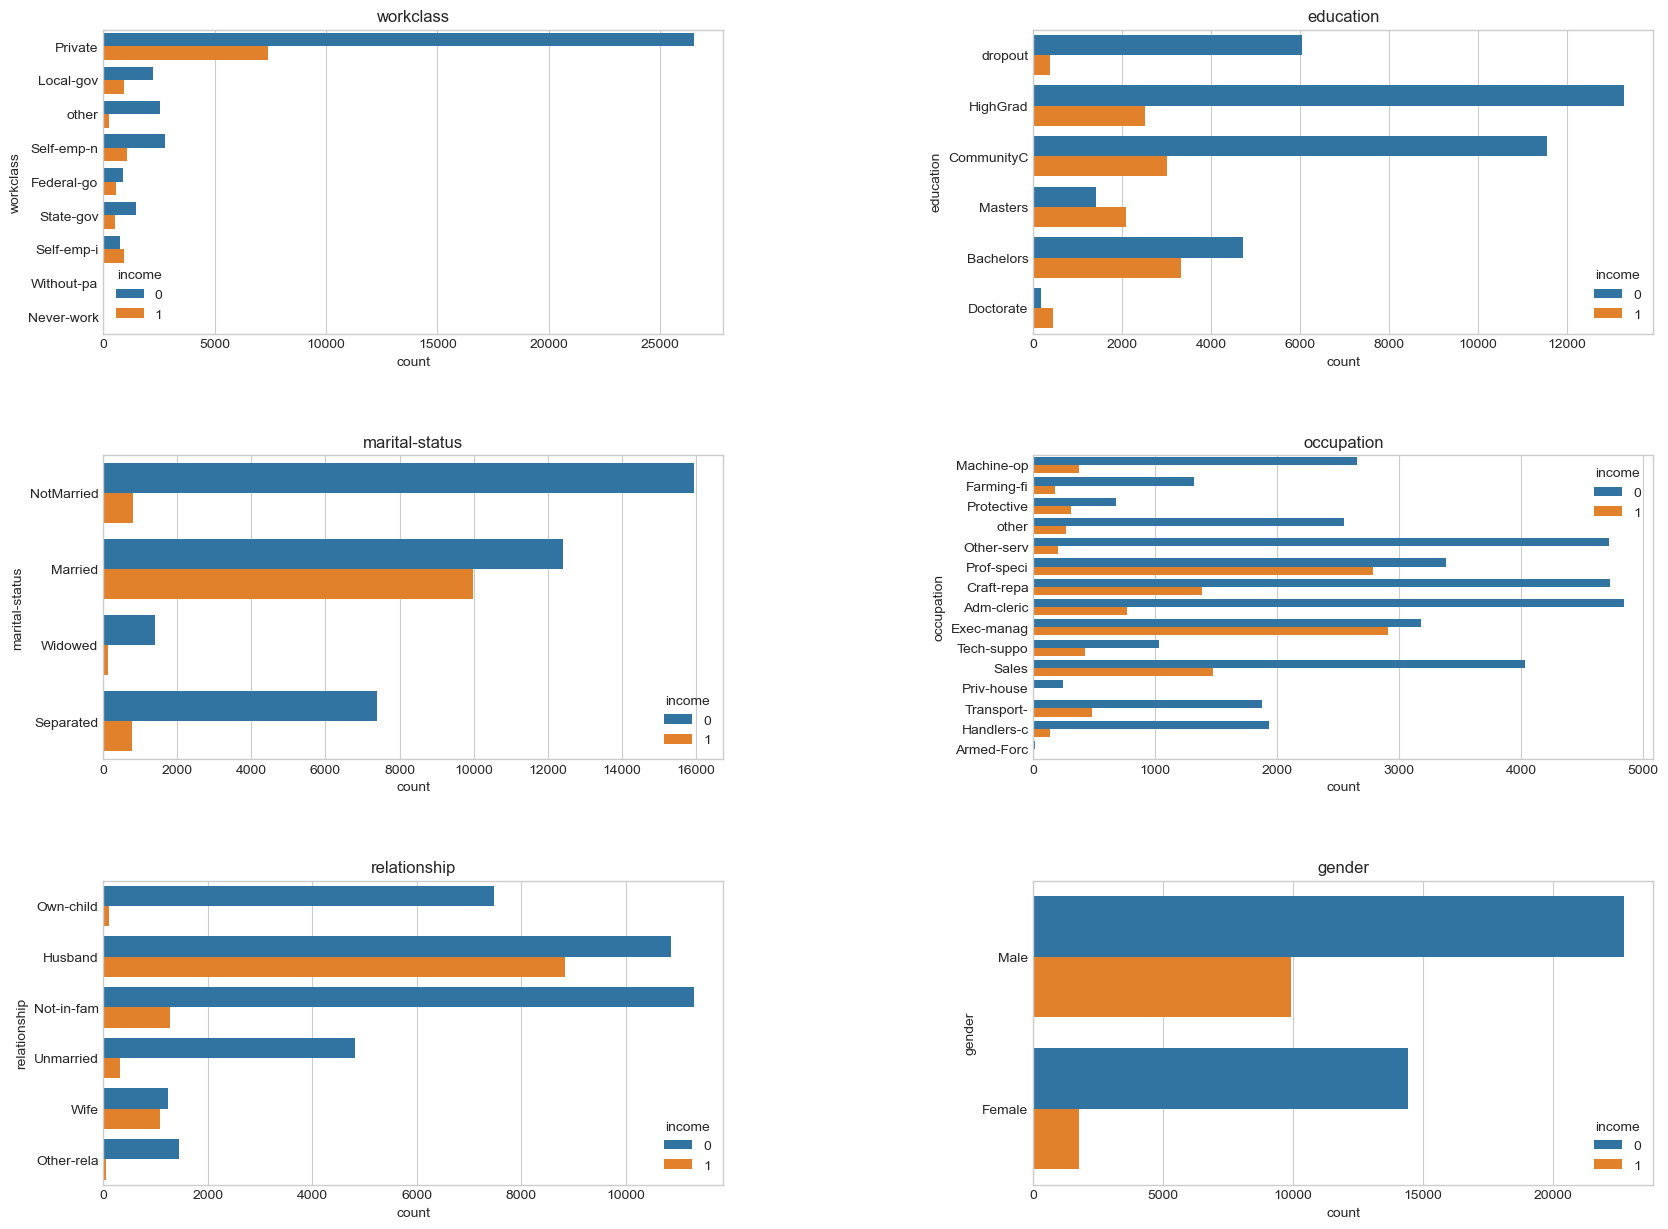

In [30]:
import math

def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    
    dataset = dataset.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
bivariate_df = df.loc[:, ['workclass', 'education', 
           'marital-status', 'occupation', 
           'relationship', 'gender','income']]  

plot_bivariate_bar(bivariate_df, hue=df['income'], cols=2, width=20, height=15, hspace=0.4, wspace=0.5)


The dataset was created in 1996, a large number of jobs fall into the category of mannual labor, e.g., Handlers cleaners, craft repairers, etc. Executive managerial role and some one with a professional speciality has a high level payment.

In [31]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'age_bin', 'hours-per-week_bin'],
      dtype='object')

### select columns

In [32]:
dff = df[['age', 'workclass',
               'marital-status', 'occupation', 'relationship', 'gender',
               'hours-per-week', 'native-country',
               'income' ]]
dff

,age,workclass,marital-status,occupation,relationship,gender,hours-per-week,native-country,income
0,25,Private,NotMarried,Machine-op-inspct,Own-child,Male,40,United-States,0
1,38,Private,Married,Farming-fishing,Husband,Male,50,United-States,0
2,28,Local-gov,Married,Protective-serv,Husband,Male,40,United-States,1
3,44,Private,Married,Machine-op-inspct,Husband,Male,40,United-States,1
4,18,other,NotMarried,other,Own-child,Female,30,United-States,0
...,...,...,...,...,...,...,...,...,...
48837,27,Private,Married,Tech-support,Wife,Female,38,United-States,0
48838,40,Private,Married,Machine-op-inspct,Husband,Male,40,United-States,1
48839,58,Private,Widowed,Adm-clerical,Unmarried,Female,40,United-States,0
48840,22,Private,NotMarried,Adm-clerical,Own-child,Male,20,United-States,0


### One Hot Encoding 

In [33]:
dff = pd.get_dummies(dff)
dff

,age,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,native-country_other
0,25,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,50,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,28,40,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,44,40,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,18,30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,38,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48838,40,40,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48839,58,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48840,22,20,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [34]:
dff.columns

Index(['age', 'hours-per-week', 'income', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'workclass_other',
       'marital-status_Married', 'marital-status_NotMarried',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'occupation_other', 'relationship_Husband',
       'relationship_Not-in-family', 'relationship_Other-relative',
       'relationship_Own-chi

In [35]:
y = dff["income"]
X = dff.loc[:,['age', 'hours-per-week', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'workclass_other',
       'marital-status_Married', 'marital-status_NotMarried',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'occupation_other', 'relationship_Husband',
       'relationship_Not-in-family', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife',
       'gender_Female', 'gender_Male',
       'native-country_Cambodia', 'native-country_Canada',
       'native-country_China', 'native-country_Columbia',
       'native-country_Cuba', 'native-country_Dominican-Republic',
       'native-country_Ecuador', 'native-country_El-Salvador',
       'native-country_England', 'native-country_France',
       'native-country_Germany', 'native-country_Greece',
       'native-country_Guatemala', 'native-country_Haiti',
       'native-country_Holand-Netherlands', 'native-country_Honduras',
       'native-country_Hong', 'native-country_Hungary', 'native-country_India',
       'native-country_Iran', 'native-country_Ireland', 'native-country_Italy',
       'native-country_Jamaica', 'native-country_Japan', 'native-country_Laos',
       'native-country_Mexico', 'native-country_Nicaragua',
       'native-country_Outlying-US(Guam-USVI-etc)', 'native-country_Peru',
       'native-country_Philippines', 'native-country_Poland',
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia']]


### Train Test Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [37]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### PCA's components graphed in 2D and 3D

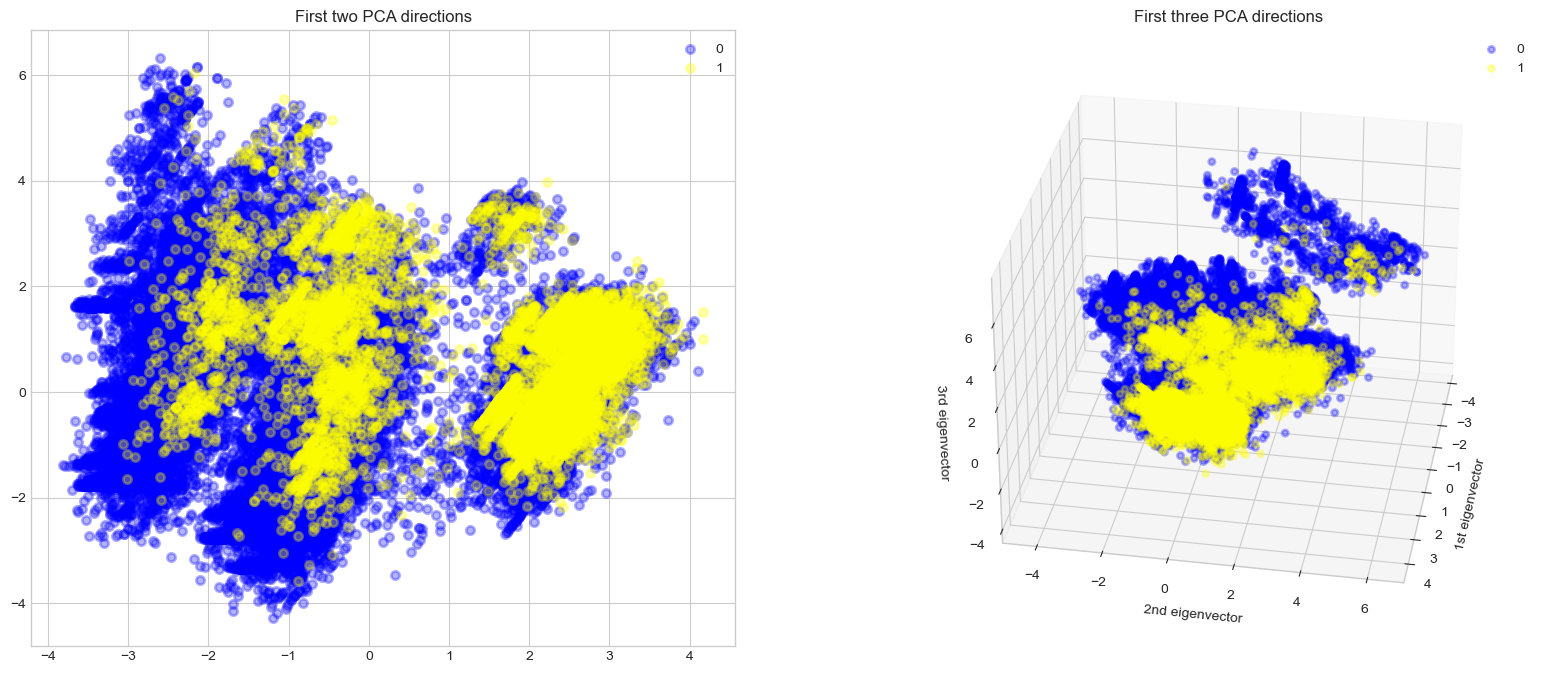

In [38]:
# Apply Scaling 
std_scale = preprocessing.StandardScaler().fit(dff.drop('income', axis=1))
X = std_scale.transform(dff.drop('income', axis=1))
y = dff['income']

# Formatting
target_names = [0,1]
colors = ['blue','yellow','pink']
lw = 2
alpha = 0.3
# 2 Components PCA
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# rotate the axes
ax.view_init(30, 10)

In [39]:
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
# from pandas.tools.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

### Gaussian Naive Bayes

In [40]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)
gaussian_y_pred = gaussian.predict(X_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

print(confusion_matrix(y_test, gaussian_y_pred))

The accuracy of Gaussian Naive Bayes is 0.60292762821169
[[3828 3646]
 [ 233 2062]]


### Linear Support Vector Machine

In [41]:
# Support Vector Classifier (SVM/SVC)
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_svc = svc.score(X_test,y_test)
svc_y_pred = svc.predict(X_test)
print('The accuracy of SVC is', score_svc)
print(confusion_matrix(y_test, svc_y_pred))

The accuracy of SVC is 0.8198382638959976
[[6878  596]
 [1164 1131]]


### Radical Support Vector Machine

In [42]:
svc_radical =svm.SVC(kernel='rbf',C=1,gamma=0.22)
svc_radical.fit(X_train,y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,y_test)
svc_radicalc_y_pred = svc_radical.predict(X_test)
print('The accuracy of Radical SVC Model is', score_svc_radical)
print(confusion_matrix(y_test, svc_radicalc_y_pred))

The accuracy of Radical SVC Model is 0.8198382638959976
[[6878  596]
 [1164 1131]]


### Logistic Regression

In [43]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
logreg_y_pred = logreg.predict(X_test)
print('The accuracy of the Logistic Regression is', score_logreg)
print(confusion_matrix(y_test, logreg_y_pred))

The accuracy of the Logistic Regression is 0.8224997440884431
[[6875  599]
 [1135 1160]]


### Random Forest

In [44]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
randomforest_y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)
print(confusion_matrix(y_test, randomforest_y_pred))

The accuracy of the Random Forest Model is 0.8064284983109837
[[6664  810]
 [1081 1214]]


### K-Nearest Neighbors

In [45]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
knn_y_pred = knn.predict(X_test)
print('The accuracy of the KNN Model is',score_knn)
print(confusion_matrix(y_test, knn_y_pred))

The accuracy of the KNN Model is 0.7991606100931518
[[6593  881]
 [1081 1214]]


### Cross validation

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

kfold = KFold(n_splits=10, shuffle=True) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Naive Bayes','Linear Svm','Radial Svm','Logistic Regression','Decision Tree','KNN','Random Forest']
models=[GaussianNB(), svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors=9),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_dataframe=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)
models_dataframe


In [ ]:
# # create a dictionary that maps categorical values to one-hot encoded column names
# column_map = {'blue': 'color_blue', 'red': 'color_red', 'yellow': 'color_yellow'}

# # prompt the user for input in the original categorical format
# user_input = input("Enter a color (blue, red, or yellow): ")

# # use the dictionary to look up the corresponding column name
# selected_column = column_map.get(user_input)

# # use the selected column for prediction or further analysis
# model.predict(df[selected_column])
